In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Import Dataframe and rename columns

In [2]:
nba_stats19 = pd.read_csv('../data/nba_stats19.csv', index_col = [0])
nba_stats19.drop(columns = ['DREB_y', 'T_DREB%_y', 'T_STL%_y', 'T_BLK%_y', 'Age_y','FT%_y'], inplace = True)
nba_stats19.rename(columns = {'Age_x': 'Age', 'FT%_x': 'FT%', 'DREB_x': 'DREB', 'T_DREB%_x' : 'T_DREB%',
                             'T_STL%_x': 'T_STL%', 'T_BLK%_x': 'T_BLK%'}, inplace = True)

# Label Stats

In [8]:
defensive_stats = ['DREB', 'DEF_RTG', 'DREB%', 'T_DREB%', 'STL', 'T_STL%',
            'BLK', 'DEF_WS', 'T_BLK%', 'T_BLKA%',
            'BLKA', 'BSR Def.', 'OVR Def.', 'WAR', 'FP']

# KMEANS 

In [9]:
X = nba_stats19[defensive_stats]
y = nba_stats19['Player']

#scale data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#dimensionality reduction
pca = PCA(n_components = 5)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.8146541695791245


In [10]:
#creating clusters
defensive = KMeans(n_clusters = 3, random_state= 248)
defensive.fit(X_pca)
y_kmeans = defensive.predict(X_pca)
nba_stats19['def_kmean'] = defensive.labels_
def_sil = silhouette_score(X_sc, defensive.labels_)
silhouette_score(X_sc, defensive.labels_)

0.17433761587820593

In [11]:
def_cluster0 = nba_stats19[nba_stats19['def_kmean'] == 0]
def_cluster1 = nba_stats19[nba_stats19['def_kmean'] == 1]
def_cluster2 = nba_stats19[nba_stats19['def_kmean'] == 2]

# Boxplot comparison

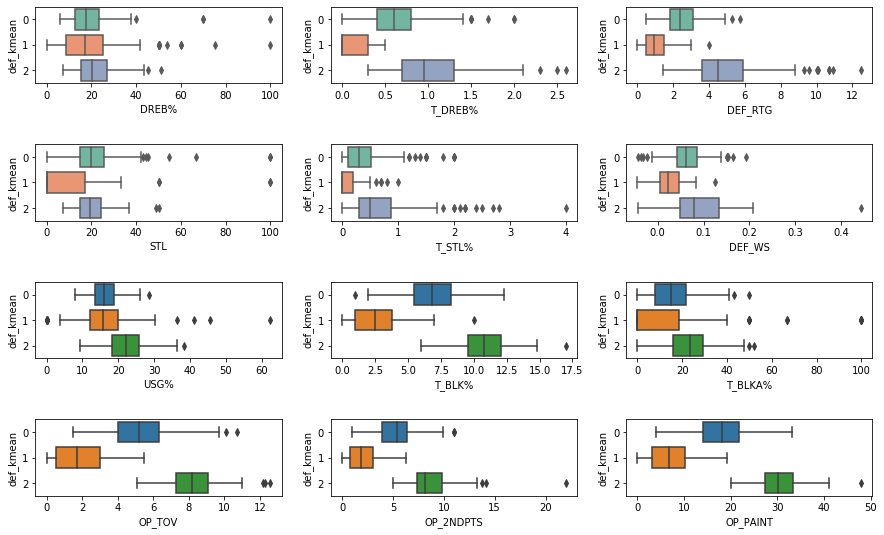

In [66]:
fig, axes = plt.subplots(4, 3, figsize = (15, 9))
plt.subplots_adjust(hspace = 0.8)
sns.boxplot(x = 'DREB%', y = 'def_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,0])
sns.boxplot(x = 'T_DREB%', y = 'def_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,1])
sns.boxplot(x = 'DEF_RTG', y = 'def_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,2])
#---------------------- line 2
sns.boxplot(x = 'STL', y = 'def_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,0])
sns.boxplot(x = 'T_STL%', y = 'def_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,1])
sns.boxplot(x = 'DEF_WS', y = 'def_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,2])
#---------------------- LINE 3
sns.boxplot(x = 'USG%', y = 'def_kmean', data = nba_stats19, orient="h", ax = axes[2,0])
sns.boxplot(x = 'T_BLK%', y = 'def_kmean', data = nba_stats19, orient="h", ax = axes[2,1])
sns.boxplot(x = 'T_BLKA%', y = 'def_kmean', data = nba_stats19, orient="h", ax = axes[2,2])
#---------------------- LINE 4
sns.boxplot(x = 'OP_TOV', y = 'def_kmean', data = nba_stats19, orient="h", ax = axes[3,0])
sns.boxplot(x = 'OP_2NDPTS', y = 'def_kmean', data = nba_stats19, orient="h", ax = axes[3,1])
sns.boxplot(x = 'OP_PAINT', y = 'def_kmean', data = nba_stats19, orient="h", ax = axes[3,2])

In [97]:
print(f'There are {len(def_cluster0)} players in Cluster 0')
print(f'There are {len(def_cluster1)} players in Cluster 1')
print(f'There are {len(def_cluster2)} players in Cluster 2')

There are 204 players in Cluster 0
There are 111 players in Cluster 1
There are 146 players in Cluster 2


**Cluster 0 - The Adapter:** Compared to the other clusters, this clusers has the most versatility/spread among all of the defensive qualities. However, cluser 0 players don't seem to be used as often in their team plays. Their biggest strengths are performing defensive rebounds and bringing points to their team after a turnover.
- honorable mentions - Damion Lee, Norman Powell, Rudy Gay, Wesley Matthews

**Cluster 1 - DO NOT DEFEND:** Based on the given defensive metrics, these players are not very reliable for defensive plays. There are a handful of these players that are used for more than 30% of their team plays. These players are probably useful for offensive plays or may just be rookies.
- honorable mentions - Ante Zizic, Justin Jackson, Frank Jackson

**Cluster 2 - The Protector:** These players will do everything they can to protect their team's basket. They have the highest success rate with their block attempts and tend to produce most of te most defensive rebounds in their teams.
- honorable mentions - JJ Redick, Jaren Jackson Jr., Goran Dragic, Giannis Antetokounmpo

Player | Defense Cluster | Salary ($) | Current Team | Named Pos
----- | -------| ------ | ------| -------|
Taj Gibson | 0 |  9,800,000 | NYK | C
Markelle Fultz | 0 |  9,732,396	| ORL | PG
Delon Wright | 0 | 9,607,500 | DAL | SG
Terence Davis | 0 | 898,310	| TOR | SG
Justin James | 0 | 898,310	| SAC | SG
Shaquille Harrison | 0 | 898,310 | CHI | SF
Brandon Knight | 1 | 15,643,750 | CAV | PG
Michael Kidd-Gilchrist | 1 | 13,000,000 | CHO | PF
Courtney Lee | 1 | 12,759,670 | DAL | SG
Matt Thomas | 1 | 898,310 | TOR | SG
Daniel Gafford | 1 | 898,310 | CHI | C
Caleb Martin | 1 | 898,310 | CHO | SF
Stephen Curry | 2 | 40,231,758 | GSW |  PG
Chris Paul | 2 | 38,506,482 | OKC |  PG
Russell Westbrook | 2 | 38,178,000 | HOU | PG
Kendrick Nunn | 2 | 1,416,852 | MIA | SG
Devonte' Graham | 2 | 1,416,852 | CHO | PG
Eric Paschall | 2 | 898,310 | GSW | PF

In [95]:
def_cluster0.to_csv('def_cluster0.csv')
def_cluster1.to_csv('def_cluster1.csv')
def_cluster2.to_csv('def_cluster2.csv')